In [2]:
!ls

1UBQ.pdb
1UBQ_processed.pdb
1hz3_T310.run.25000000.edr
1hz3_T310.run.25000000.energy.out
1hz3_T310.run.25000000.energy.xvg
1hz3_T310.start.nowater.gro
1hz3_T310.stepid25000000.every100ps.nowater.xtc
get_energy.sh
homework2.ipynb


In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
import mdtraj

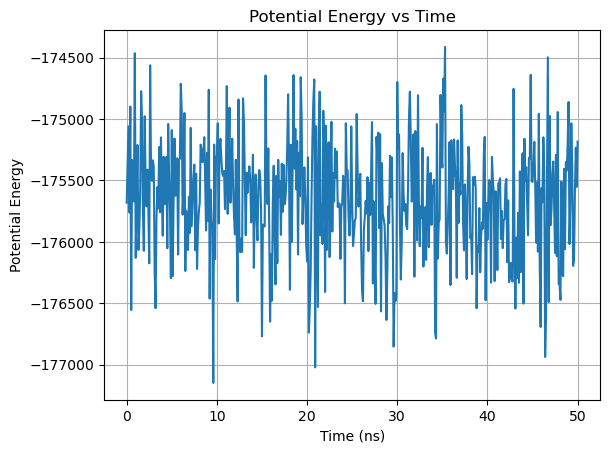

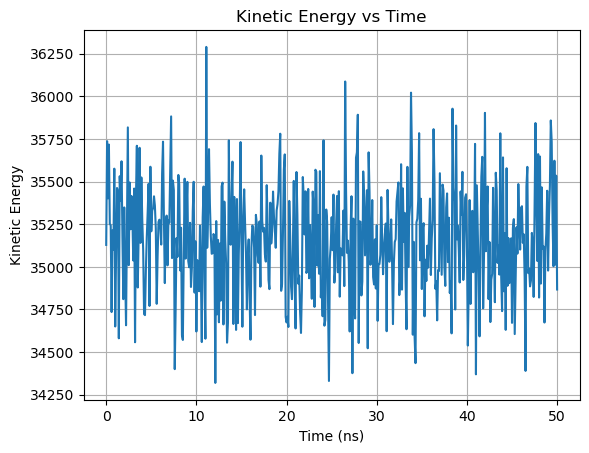

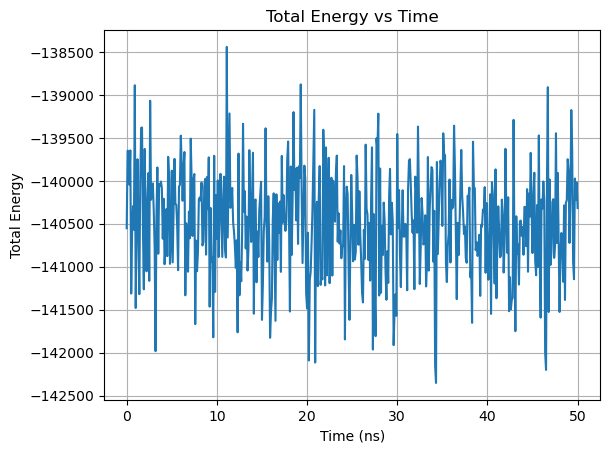

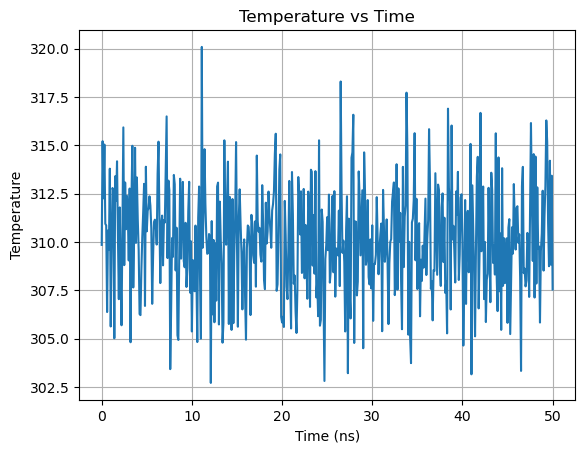

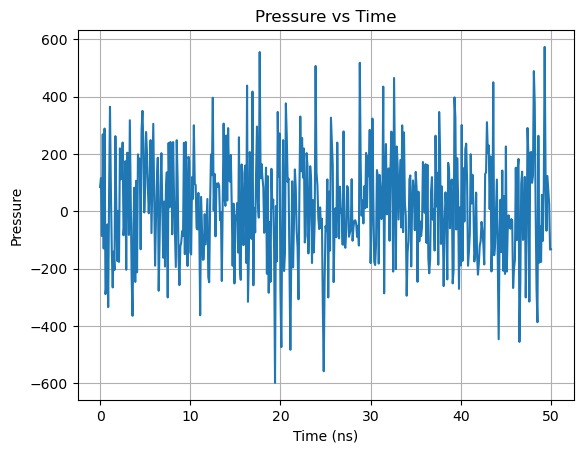

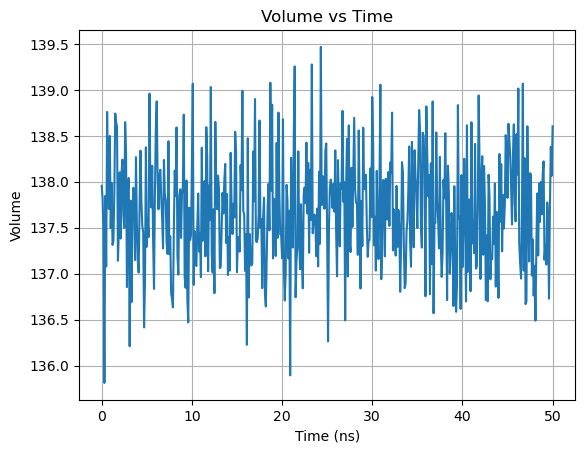

In [4]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# a) Read in the data file
# Adjust this path to point to the correct file on your system
file_path = './1hz3_T310.run.25000000.energy.xvg'

# Open the file to inspect the header and skip the appropriate lines (assuming first 20 lines are comments)
with open(file_path, 'r') as f:
    for i in range(20):
        print(f.readline().strip())

# Read the data into a pandas dataframe, skipping comment lines
df = pd.read_csv(file_path, delim_whitespace=True, comment='@', skiprows=24, header=None)

# Assuming the columns are as follows based on the file's typical structure
df.columns = ['Time(ps)', 'Potential Energy', 'Kinetic Energy', 'Total Energy', 'Temperature', 
              'Pressure', 'Volume']

# Convert time from ps to ns (since 1 ns = 1000 ps)
df['Time(ns)'] = df['Time(ps)'] / 1000

df


# This file was created Tue Sep 13 13:28:40 2022
# Created by:
#                      :-) GROMACS - gmx energy, 2020.4 (-:
#
# Executable:   /share/apps/gromacs/2020.4/openmpi/intel/bin/gmx_mpi
# Data prefix:  /share/apps/gromacs/2020.4/openmpi/intel
# Working dir:  /scratch/projects/hockygroup/gmh4/projects/CompLab/comp-lab-class/Week2/Data
# Command line:
#   gmx_mpi energy -f 1hz3_T310.run.25000000.edr
# gmx energy is part of G R O M A C S:
#
# Georgetown Riga Oslo Madrid Amsterdam Chisinau Stockholm
#
@    title "GROMACS Energies"
@    xaxis  label "Time (ps)"
@    yaxis  label "(kJ/mol), (K), (bar), (nm^3)"
@TYPE xy
@ view 0.15, 0.15, 0.75, 0.85
@ legend on
@ legend box on


,Time(ps),Potential Energy,Kinetic Energy,Total Energy,Temperature,Pressure,Volume,Time(ns)
0,0.0,-175680.937500,35128.644531,-140552.296875,309.853302,84.967438,137.956879,0.0
1,100.0,-175387.062500,35737.015625,-139650.046875,315.219452,116.084549,137.819077,0.1
2,200.0,-175059.531250,35401.789062,-139657.750000,312.262573,-85.727356,137.437531,0.2
3,300.0,-175760.984375,35717.289062,-140043.687500,315.045502,269.017548,135.811859,0.3
4,400.0,-174898.718750,35252.562500,-139646.156250,310.946320,-129.284088,137.846680,0.4
...,...,...,...,...,...,...,...,...
496,49600.0,-176148.750000,35003.425781,-141145.328125,308.748810,123.643768,136.727814,49.6
497,49700.0,-175596.437500,35622.363281,-139974.078125,314.208221,76.174149,137.710068,49.7
498,49800.0,-175233.296875,35012.890625,-140220.406250,308.832306,25.778091,138.378967,49.8
499,49900.0,-175552.906250,35534.488281,-140018.421875,313.433105,-133.103729,138.065186,49.9


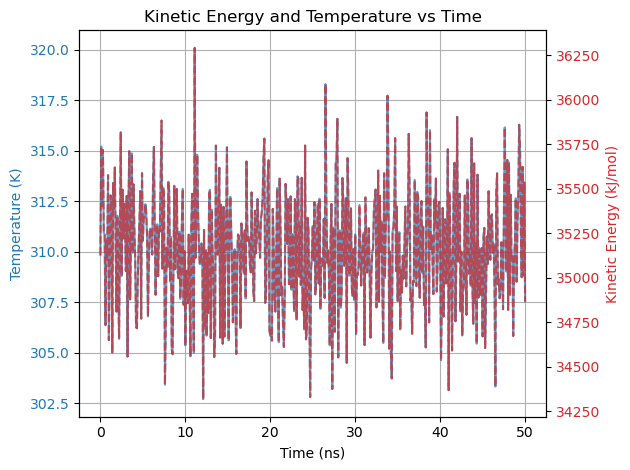

In [6]:
# c) Plot kinetic energy and temperature on the same plot with two y-axes
fig, ax1 = plt.subplots()

# Plot Temperature on the left y-axis
color1 = 'tab:blue'
ax1.set_xlabel('Time (ns)')
ax1.set_ylabel('Temperature (K)', color=color1)
ax1.plot(df['Time(ns)'], df['Temperature'], color=color1, label='Temperature', linestyle='-', alpha=0.7)
ax1.tick_params(axis='y', labelcolor=color1)

# Plot Kinetic Energy on the right y-axis
ax2 = ax1.twinx()  # Create a second y-axis sharing the same x-axis
color2 = 'tab:red'
ax2.set_ylabel('Kinetic Energy (kJ/mol)', color=color2)
ax2.plot(df['Time(ns)'], df['Kinetic Energy'], color=color2, label='Kinetic Energy', linestyle='--', alpha=0.7)
ax2.tick_params(axis='y', labelcolor=color2)

# Adding a title and showing the plot with gridlines
plt.title('Kinetic Energy and Temperature vs Time')
fig.tight_layout()  # Adjust layout to make room for both y-axes

# Show the grid only for the primary y-axis (Temperature)
ax1.grid(True)

plt.show()


In [8]:
!pip install mdtraj

Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 31.2 MB/s eta 0:00:0000:01


In [6]:
# Import the necessary libraries
import mdtraj as md
import numpy as np

# a) Read in the ubiquitin structure
# You can load either '1UBQ.pdb' or '1UBQ_processed.pdb' depending on the file you want to analyze

pdb_file = '1UBQ_processed.pdb'  # or '1UBQ_processed.pdb'
traj = md.load(pdb_file)

# Print the trajectory summary to ensure it loaded correctly
print(traj)

# b) Print the total number of hydrogen bonds
# MDTraj has a function to find hydrogen bonds: md.baker_hubbard()

# Compute hydrogen bonds using Baker-Hubbard criteria
h_bonds = md.baker_hubbard(traj, periodic=False)

# The number of hydrogen bonds is simply the length of the array
print(f'Total number of hydrogen bonds: {len(h_bonds)}')

# c) Compute the number of helical amino acids
# MDTraj provides a function to calculate the secondary structure using DSSP algorithm

# Calculate the secondary structure
secondary_structure = md.compute_dssp(traj)

# Convert the DSSP output into a numpy array
secondary_structure = np.array(secondary_structure)

# Count the number of helical amino acids (H = alpha-helix in DSSP)
num_helical_amino_acids = np.sum(secondary_structure == 'H')

print(f'Number of helical amino acids: {num_helical_amino_acids}')

<mdtraj.Trajectory with 1 frames, 1405 atoms, 134 residues, and unitcells>
Total number of hydrogen bonds: 57
Number of helical amino acids: 18


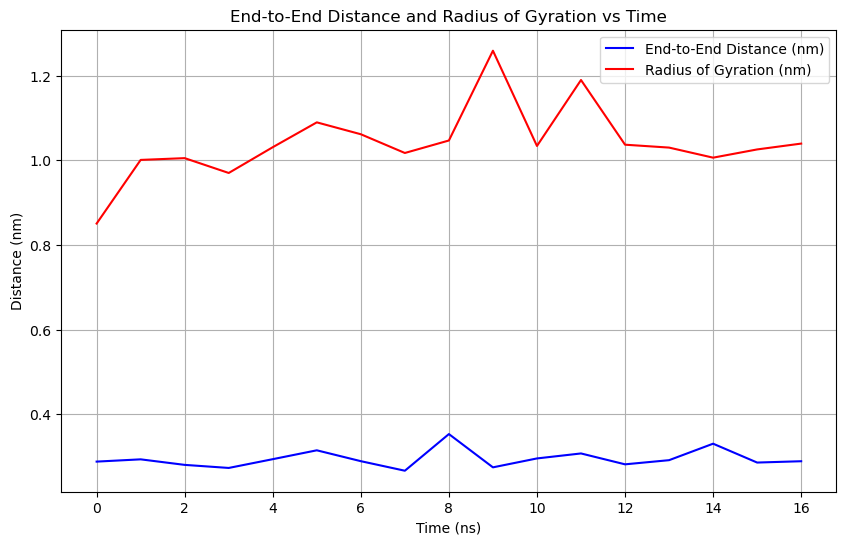

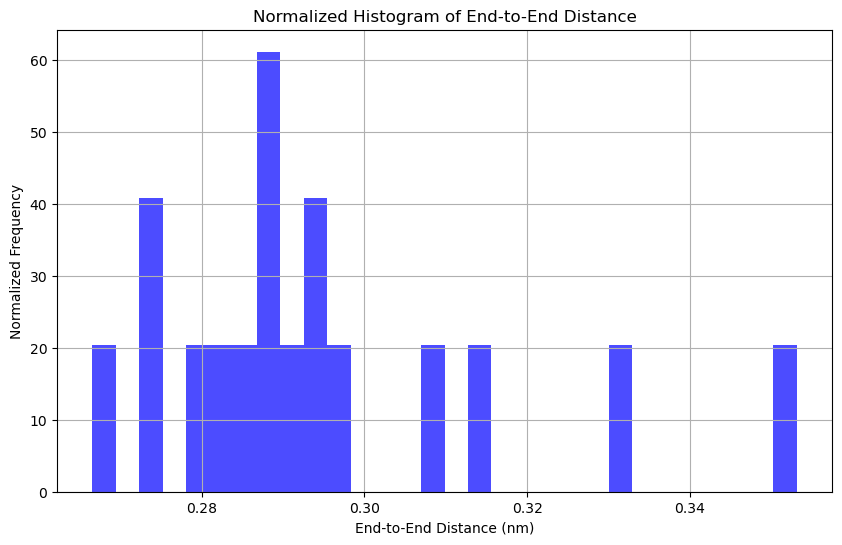

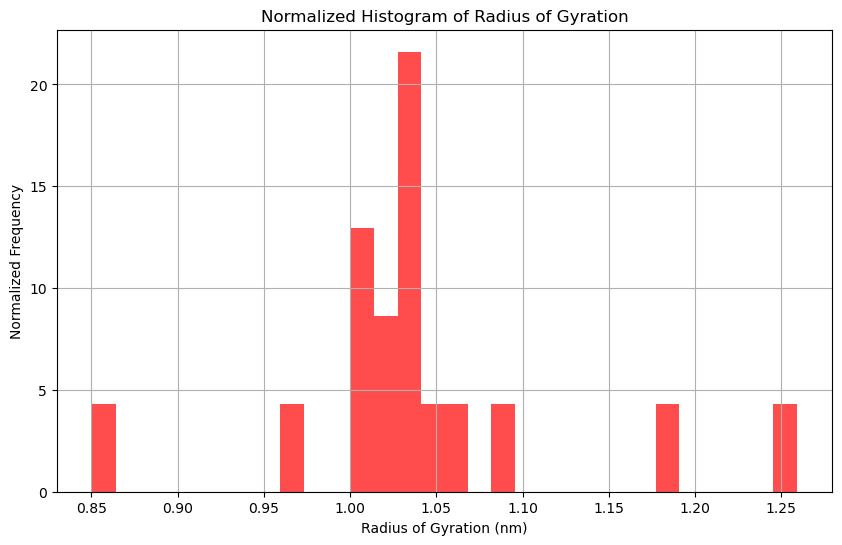

In [7]:
# Import necessary libraries
import mdtraj as md
import numpy as np
import matplotlib.pyplot as plt

# a) Read in the md trajectory of beta amyloid in the Data folder

# Load the trajectory and topology file (assuming you have a .xtc or .dcd file and a .gro or .pdb file)
traj_file = './1hz3_T310.stepid25000000.every100ps.nowater.xtc'  # Example .xtc file for the trajectory
topology_file = './1hz3_T310.start.nowater.gro'  # Example .gro file for the topology

# Load the trajectory using MDTraj
traj = md.load(traj_file, top=topology_file)

# b) Compute the end-to-end distance and radius of gyration at each time
# Assuming you want to compute the distance between the first and last residue (end-to-end distance)

# Select the first and last atom of the beta amyloid chain (adjust as necessary)
atom_indices = traj.top.select('resid 0')  # Adjust to the residues of interest for end-to-end
first_residue_atom = atom_indices[0]       # Assuming first atom of the first residue
last_residue_atom = atom_indices[-1]       # Assuming last atom of the last residue

# Compute end-to-end distances for each frame
end_to_end_distances = md.compute_distances(traj, [[first_residue_atom, last_residue_atom]])

# Compute the radius of gyration at each frame
radii_of_gyration = md.compute_rg(traj)

# c) Plot the end-to-end distance and radius of gyration vs. time on the same plot
time = traj.time / 1000  # Convert time from ps to ns (assuming your trajectory is in ps)

plt.figure(figsize=(10, 6))
plt.plot(time, end_to_end_distances, label='End-to-End Distance (nm)', color='blue')
plt.plot(time, radii_of_gyration, label='Radius of Gyration (nm)', color='red')
plt.xlabel('Time (ns)')
plt.ylabel('Distance (nm)')
plt.title('End-to-End Distance and Radius of Gyration vs Time')
plt.legend()
plt.grid(True)
plt.show()

# d) Plot normalized histograms for both end-to-end distance and radius of gyration

# Plot normalized histogram of end-to-end distance
plt.figure(figsize=(10, 6))
plt.hist(end_to_end_distances, bins=30, density=True, alpha=0.7, color='blue')
plt.xlabel('End-to-End Distance (nm)')
plt.ylabel('Normalized Frequency')
plt.title('Normalized Histogram of End-to-End Distance')
plt.grid(True)
plt.show()

# Plot normalized histogram of radius of gyration
plt.figure(figsize=(10, 6))
plt.hist(radii_of_gyration, bins=30, density=True, alpha=0.7, color='red')
plt.xlabel('Radius of Gyration (nm)')
plt.ylabel('Normalized Frequency')
plt.title('Normalized Histogram of Radius of Gyration')
plt.grid(True)
plt.show()